<a href="https://colab.research.google.com/github/juancbotero/aplicaciones_finanzas/blob/main/Optimal_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **En primer lugar importamos las librerías que vamos a necesitar.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
from matplotlib.figure import Figure
import plotly.graph_objects as go
from scipy.optimize import minimize

## **En el segundo paso importamos desde yahoo finance la data de los activos que seleccionemos.**

In [6]:
# Next we will get the stock tickers and the price data.

tick = ['JPM', 'AAPL', 'WMT', 'TGT', 'MSFT', 'AMZN', 'META','JNJ', 'PG', 'DIS']
price_data = yf.download(tick,
                         start='2014-01-01',
                         end='2023-05-31')['Adj Close']

price_data.columns = tick

ticker_SP500 = '^GSPC'

SP500_data = yf.download(ticker_SP500,
                         start='2014-01-01',
                         end='2023-05-31')['Adj Close']

SP500_data.columns = ticker_SP500

print(price_data.head())
print()
print(SP500_data.head())

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
                  JPM       AAPL        WMT        TGT       MSFT       AMZN  \
Date                                                                           
2014-01-02  17.341551  19.898500  70.192520  69.894470  44.318989  54.709999   
2014-01-03  16.960625  19.822001  70.045265  70.524101  44.661606  54.560001   
2014-01-06  17.053114  19.681499  69.778374  70.892632  44.920464  57.200001   
2014-01-07  16.931152  19.901501  70.256935  72.397552  44.402733  57.919998   
2014-01-08  17.038372  20.096001  69.226196  72.297760  44.821487  58.230000   

                 META        JNJ         PG        DIS  
Date                                                    
2014-01-02  31.354326  60.407982  48.036289  64.015541  
2014-01-03  31.143389  60.340492  48.271988  63.804611  
2014-01-06  30.485250  60.482979  47.945061  63.447655  
2014-01-07  30

## **En el tercer paso calculamos los retornos de cada uno de los activos, partiendo de la serie de precios que bajamos.**

In [7]:
returns_data = price_data.pct_change(1)

returns_data.dropna(inplace=True)

returns_SP500 = SP500_data.pct_change(1)

returns_SP500.dropna(inplace=True)

print(returns_data.head())
print()
print(returns_SP500.head())

                 JPM      AAPL       WMT       TGT      MSFT      AMZN  \
Date                                                                     
2014-01-03 -0.021966 -0.003845 -0.002098  0.009008  0.007731 -0.002742   
2014-01-06  0.005453 -0.007088 -0.003810  0.005226  0.005796  0.048387   
2014-01-07 -0.007152  0.011178  0.006858  0.021228 -0.011525  0.012587   
2014-01-08  0.006333  0.009773 -0.014671 -0.001378  0.009431  0.005352   
2014-01-09 -0.012770 -0.002264 -0.004254  0.006053 -0.001869 -0.017345   

                META       JNJ        PG       DIS  
Date                                                
2014-01-03 -0.006728 -0.001117  0.004907 -0.003295  
2014-01-06 -0.021133  0.002361 -0.006773 -0.005595  
2014-01-07  0.007750  0.009673 -0.002379  0.003069  
2014-01-08 -0.017852 -0.014493 -0.003497 -0.007903  
2014-01-09 -0.006432  0.002243  0.010369  0.003341  

Date
2014-01-03   -0.000333
2014-01-06   -0.002512
2014-01-07    0.006082
2014-01-08   -0.000212
2014-01-09  

## **En el cuarto paso calculamos el retorno promedio de los activos, así como su desviación estándar.**

In [8]:
Assets_Returns = (np.mean(returns_data)*252)
print('Annual Asset Returns')
print(Assets_Returns)

print()

Assets_Std = (np.std(returns_data)*np.sqrt(252))
print('Annual Standard Deviations')
print(Assets_Std)

print()



Annual Asset Returns
JPM     0.289221
AAPL    0.248322
WMT     0.061330
TGT     0.099986
MSFT    0.156719
AMZN    0.239816
META    0.288309
JNJ     0.107535
PG      0.154330
DIS     0.109534
dtype: float64

Annual Standard Deviations
JPM     0.288869
AAPL    0.333537
WMT     0.273957
TGT     0.180816
MSFT    0.274864
AMZN    0.378957
META    0.273740
JNJ     0.184423
PG      0.302045
DIS     0.210180
dtype: float64



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## **En este quinto paso calculamos el Ratio de Sharpe de cada uno de los activos con los que estamos trabajando, así como el del S&P500.**

In [9]:
risk_free_asset = 0.04

Sharpe_Ratios_Assets = (Assets_Returns - risk_free_asset) / Assets_Std

print('Sharpe Ratios')
print(Sharpe_Ratios_Assets)

print()

Sharpe_Ratio_SP500 = (np.mean(returns_SP500)*252 - risk_free_asset) / (np.std(returns_SP500)*np.sqrt(252))
print('S&P 500 Sharpe Ratio')
print(Sharpe_Ratio_SP500)

Sharpe Ratios
JPM     0.862746
AAPL    0.624584
WMT     0.077857
TGT     0.331750
MSFT    0.424643
AMZN    0.527279
META    0.907097
JNJ     0.366199
PG      0.378519
DIS     0.330832
dtype: float64

S&P 500 Sharpe Ratio
0.35927427053359623


## **En el sexto paso convertimos los precios de los activos a Base 100, con el fin de poderlos apreciar mejor en una gráfica.**

In [10]:
# create price series
# Create a DataFrame with prices starting at 100 for each asset
Prices_Base100 = (1 + returns_data).cumprod() * 100
print(Prices_Base100.head())

print()

SP500_Base100 = (1 + returns_SP500).cumprod() * 100
print('S&P 500 Base 100')
print(SP500_Base100.head())

                  JPM        AAPL         WMT         TGT        MSFT  \
Date                                                                    
2014-01-03  97.803391   99.615549   99.790213  100.900831  100.773071   
2014-01-06  98.336730   98.909461   99.409985  101.428098  101.357149   
2014-01-07  97.633438  100.015078  100.091769  103.581231  100.188957   
2014-01-08  98.251720  100.992538   98.623324  103.438455  101.133822   
2014-01-09  96.997063  100.763879   98.203760  104.064617  100.944839   

                  AMZN       META         JNJ          PG        DIS  
Date                                                                  
2014-01-03   99.725831  99.327246   99.888277  100.490668  99.670502  
2014-01-06  104.551273  97.228211  100.124151   99.810084  99.112893  
2014-01-07  105.867299  97.981707  101.092627   99.572664  99.417065  
2014-01-08  106.433925  96.232518   99.627529   99.224439  98.631363  
2014-01-09  104.587831  95.613551   99.851006  100.253247  98.

## **En esta parte vamos a graficar los precios de los activos en base 100, así como el SP500, también en base 100.**

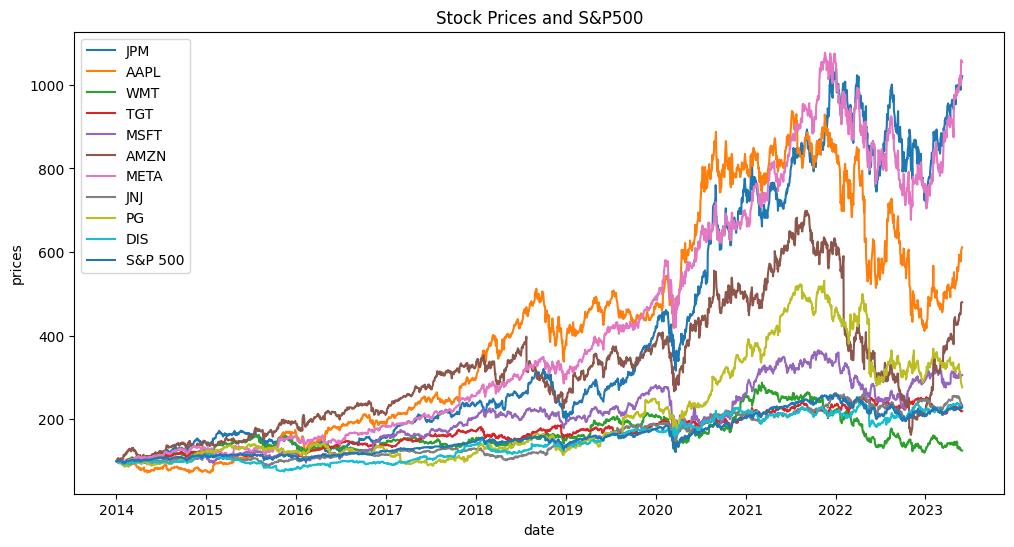

In [11]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# plotting the points
plt.plot(Prices_Base100, label=(tick))
plt.plot(SP500_Base100, label='S&P 500')

# naming the x axis
plt.xlabel('date')
# naming the y axis
plt.ylabel('prices')

# giving a title to my graph
plt.title('Stock Prices and S&P500')

# Adding legends based on column names in the DataFrame
plt.legend()


# function to show the plot
plt.show()

## **Ahora Calcularemos tanto la Matriz de Correlaciones como la Matriz de Varianza-Covarianza**

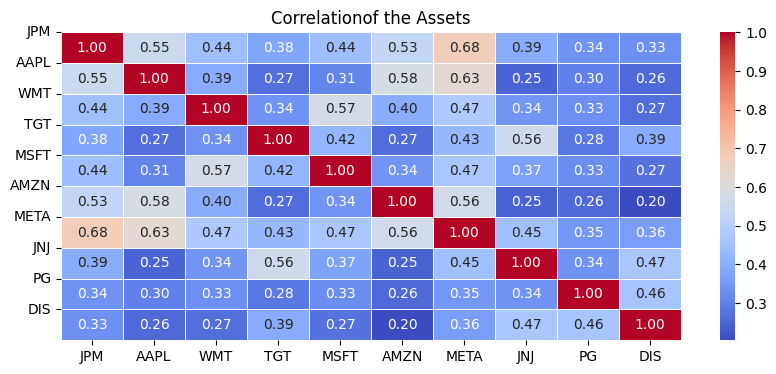


Matrix Variance-Covariance (Annual)
           JPM      AAPL       WMT       TGT      MSFT      AMZN      META  \
JPM   0.083481  0.053012  0.035173  0.019902  0.035188  0.057941  0.053478   
AAPL  0.053012  0.111294  0.035885  0.016042  0.028241  0.073436  0.057181   
WMT   0.035173  0.035885  0.075084  0.016774  0.043070  0.041147  0.035623   
TGT   0.019902  0.016042  0.016774  0.032708  0.020937  0.018196  0.021167   
MSFT  0.035188  0.028241  0.043070  0.020937  0.075582  0.035604  0.035337   
AMZN  0.057941  0.073436  0.041147  0.018196  0.035604  0.143669  0.058634   
META  0.053478  0.057181  0.035623  0.021167  0.035337  0.058634  0.074965   
JNJ   0.020988  0.015256  0.017225  0.018679  0.018726  0.017211  0.022655   
PG    0.029490  0.030341  0.027201  0.015558  0.027137  0.029382  0.028682   
DIS   0.020124  0.018065  0.015442  0.014870  0.015796  0.016222  0.020748   

           JNJ        PG       DIS  
JPM   0.020988  0.029490  0.020124  
AAPL  0.015256  0.030341  0.01

In [12]:
Mat_Correlaciones = returns_data.corr()

import seaborn as sns

plt.figure(figsize=(10, 4))
sns.heatmap(Mat_Correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.xticks(
    ticks=np.arange(0.5, len(tick), 1),
    labels=tick,
    rotation=0,
    ha='center')

plt.yticks(range(len(tick)), tick, rotation=0)

plt.title('Correlationof the Assets')
plt.show()

print()
print('Matrix Variance-Covariance (Annual)')
Mat_Var_Covar = returns_data.cov()*252
print(Mat_Var_Covar)


## **Ahora vamos a calcular el retorno y varianza de un portafolio de pesos iguales (Equally Weighted)**

In [13]:
num_assets = len(tick)
W_equal = np.ones(num_assets) / num_assets
print(W_equal)

print()

print('Return of an Equally Weighted Portfolio')
Return_Equally_Weighted = np.dot(W_equal, Assets_Returns)
print(f"{Return_Equally_Weighted:.2%}")

print()

print('Variance of an Equally Weighted Portfolio')
Variance_Equally_Weighted = np.dot(np.dot(W_equal, Mat_Var_Covar), W_equal.T)
print(f"{Variance_Equally_Weighted:.2%}")

print()

print('Sharpe Ratio of an Equally Weighted Portfolio')
SR_Equally_Weighted = (Return_Equally_Weighted - risk_free_asset) / np.sqrt(Variance_Equally_Weighted)
print(f"{SR_Equally_Weighted:.2}")

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Return of an Equally Weighted Portfolio
17.55%

Variance of an Equally Weighted Portfolio
3.36%

Sharpe Ratio of an Equally Weighted Portfolio
0.74


## **A continuación simulamos muchos vectores W y para cada uno, calculamos el retorno del portafolio de riesgo, su desviación estándar y el Ratio de Sharpe**

In [43]:
# Simulating 100000 portfolios
num_port = 200000

# Creating an empty array to store portfolio weights
all_weights = np.zeros((num_port, len(tick)))

# Creating an empty array to store portfolio returns
returns = np.zeros((num_port))

# Creating an empty array to store portfolio risks
stand_dev = np.zeros((num_port))

# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

# Lets run the for loop.
for i in range(num_port):
  weights = np.array(np.random.random(num_assets))
  weights = weights/np.sum(weights)

  # saving weights in the array
  all_weights[i,:] = weights

  # Saving Portfolio returns
  returns[i] = np.dot(weights, Assets_Returns)

  # Portfolio Risk
  stand_dev[i]= np.sqrt(np.dot(np.dot(weights, Mat_Var_Covar), weights.T))

  # Portfolio Sharpe Ratio
  sharpe_ratio[i] = (returns[i] - risk_free_asset) / stand_dev[i]


## **Seguidamente vamos a seleccionar el portafolio que tenga el máximo Ratio de Sharpe y ese será el portafolio óptimo**

      optimal weight
JPM         0.221236
AAPL        0.081475
WMT         0.001951
TGT         0.037530
MSFT        0.054142
AMZN        0.054495
META        0.306429
JNJ         0.112273
PG          0.058444
DIS         0.072024

Sharpe Ratio Óptimo = 0.9113117499194477

JPM     0.862746
AAPL    0.624584
WMT     0.077857
TGT     0.331750
MSFT    0.424643
AMZN    0.527279
META    0.907097
JNJ     0.366199
PG      0.378519
DIS     0.330832
dtype: float64


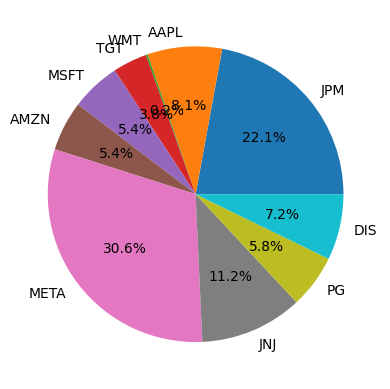

In [45]:
sharpe_ratio.max()

sharpe_ratio.argmax()

optimal_weights = all_weights[sharpe_ratio.argmax(),:]

return_optimal_portfolio = returns[sharpe_ratio.argmax()]

std_dev_optimal_portfolio = stand_dev[sharpe_ratio.argmax()]

df = pd.DataFrame(optimal_weights, columns=['optimal weight'], index=tick)

print(df)
print()
print(f'Sharpe Ratio Óptimo = {sharpe_ratio.max()}')
print()
print(Sharpe_Ratios_Assets)

plt.pie(optimal_weights, labels=tick, autopct='%1.1f%%')

plt.show()


## **Ahora vamos a graficar todos los portafolios simulados**

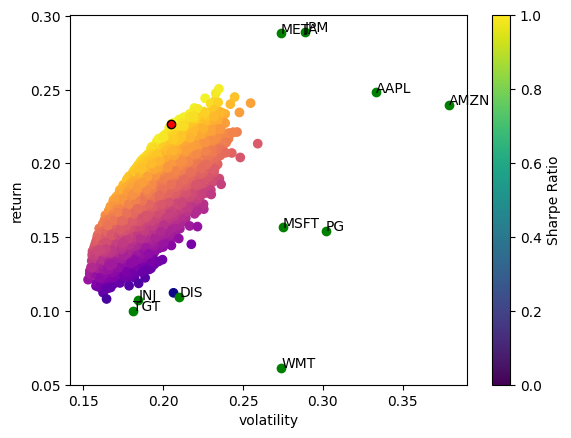

In [52]:
plt.scatter(stand_dev, returns, c=sharpe_ratio, cmap='plasma')
plt.scatter(Assets_Std, Assets_Returns, c='green')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('volatility')
plt.ylabel('return')

labels = tick
for i, label in enumerate(labels):
    plt.text(Assets_Std[i], Assets_Returns[i], label)

plt.scatter(std_dev_optimal_portfolio, return_optimal_portfolio, c='red', edgecolors='black')